In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Data Overview

In [2]:
df = pd.read_csv('train_1.csv')
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [4]:
data_start_date = df.columns[1]
data_end_date = df.columns[-1]
print('Data ranges from %s to %s' % (data_start_date, data_end_date))

Data ranges from 2015-07-01 to 2016-12-31


In [5]:
df = pd.read_csv('train_2.csv')
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


In [6]:
data_start_date = df.columns[1]
data_end_date = df.columns[-1]
print('Data ranges from %s to %s' % (data_start_date, data_end_date))

Data ranges from 2015-07-01 to 2017-09-10


Check and confirmation of the date overlap between the two datasets (Train1.csv and Train2.csv)

In [7]:
train1 = pd.read_csv('train_1.csv')
train2 = pd.read_csv('train_2.csv')

date_columns_train1 = train1.columns[1:]
date_columns_train2 = train2.columns[1:]

train1_dates = pd.to_datetime(date_columns_train1)
train2_dates = pd.to_datetime(date_columns_train2)

train1_min_date = train1_dates.min()
train1_max_date = train1_dates.max()
train2_min_date = train2_dates.min()
train2_max_date = train2_dates.max()

overlap_start = max(train1_min_date, train2_min_date)
overlap_end = min(train1_max_date, train2_max_date)

if overlap_start <= overlap_end:
    print(f"Dates overlap from {overlap_start} to {overlap_end}")
else:
    print("No overlap between the date ranges of Train1 and Train2.")

Dates overlap from 2015-07-01 00:00:00 to 2016-12-31 00:00:00


In [8]:
# Extract the page names
page_names_train1 = train1.iloc[:, 0]
page_names_train2 = train2.iloc[:, 0]

# Filter the date columns based on the overlapping range
date_columns_overlap = train1.columns[1:]
overlap_columns = ['Page'] + list(date_columns_overlap)

train1_overlap = train1[overlap_columns]
train2_overlap = train2[overlap_columns]

# Merge the two datasets based on the page name
merged_data = pd.merge(train1_overlap, train2_overlap, on='Page', suffixes=('_train1', '_train2'))
merged_data.columns = merged_data.columns.str.replace('_train1', '').str.replace('_train2', '')
final_data = pd.DataFrame()
final_data['Page'] = merged_data['Page']

columns_to_merge = []

for col in date_columns_overlap:
    merged_column = merged_data[col].mean(axis=1)
    columns_to_merge.append(pd.DataFrame({col: merged_column}))

final_data = pd.concat([final_data] + columns_to_merge, axis=1)
final_data.to_csv('Merged_Wikipedia_Traffic.csv', index=False)

In [9]:
df = pd.read_csv('Merged_Wikipedia_Traffic.csv')
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


## Missing Data Analysis

In [11]:
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data

2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
2015-07-05    20659
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 550, dtype: int64

In [12]:
missing_data_proportion = df.isnull().mean() * 100
missing_data_proportion = missing_data_proportion[missing_data_proportion > 0]
missing_data_proportion = missing_data_proportion.sort_values(ascending=False)
missing_data_proportion_formatted = missing_data_proportion.apply(lambda x: f"{x:.2f}%")
missing_data_proportion_formatted

2015-07-02    14.35%
2015-07-01    14.30%
2015-07-07    14.24%
2015-07-05    14.24%
2015-07-04    14.24%
               ...  
2016-12-12     2.44%
2016-12-31     2.39%
2016-12-20     2.25%
2016-12-21     2.23%
2016-12-24     2.20%
Length: 550, dtype: object

In [13]:
cleaned_data = merged_data.dropna()
cleaned_data.to_csv('Merged_Wikipedia_Traffic.csv', index=False)

In [14]:
df = pd.read_csv('Merged_Wikipedia_Traffic.csv')
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data

Series([], dtype: int64)

## Feature Distribution and Univariate Analysis

Smoothing and log1p transformation are applied to web traffic data to normalize the data, reduce noise, and allow for clearer visualizations of the traffic.

Smoothing, using a rolling window (30 days), reduces short-term fluctuations, revealing long-term trends by averaging values over a set period. The log1p transformation compresses large traffic values and handles zero counts effectively, making differences in traffic across pages more comparable.

In [15]:
def plot_wikipedia_traffic(merged_data, pages_to_compare=9, window_size=30, show_by_month=True):
    selected_pages = np.random.choice(merged_data['Page'].unique(), size=pages_to_compare, replace=False)

    for i in range(0, len(selected_pages), 3):
        subset_pages = selected_pages[i:i + 3]
        plt.figure(figsize=(12, 4))

        for page in subset_pages:
            page_data = merged_data[merged_data['Page'] == page].set_index('Page').T
            page_data.index = pd.to_datetime(page_data.index, errors='coerce')
            page_data = page_data.apply(pd.to_numeric, errors='coerce')

            # Calculate the average page views (non-log-transformed)
            average_page_views = page_data.mean().values[0]
            # Apply log1p transformation
            page_data_log = np.log1p(page_data)
            # Smooth traffic data using a rolling window
            page_data_smoothed = page_data_log.rolling(window=window_size, min_periods=1).mean()
            name_project = '_'.join(page.rsplit('_', 2)[:-2])
            plt.plot(page_data.index, page_data_smoothed, label=f'{name_project} (Avg: {average_page_views:.0f} views)')

        if show_by_month:
            plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Avg Daily Page Views (log1p)', fontsize=12)
        plt.gcf().autofmt_xdate(rotation=45)

        plt.grid(True)
        plt.legend(loc='upper right')
        plt.tight_layout()
        plt.show()

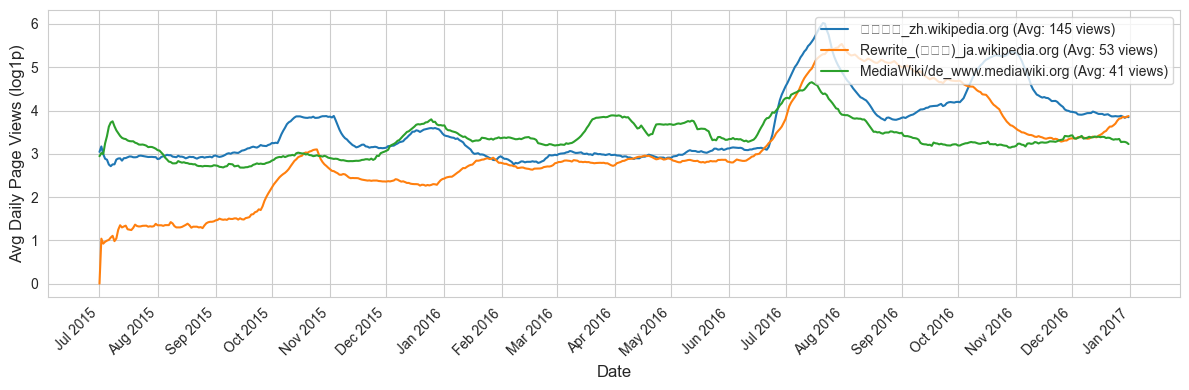

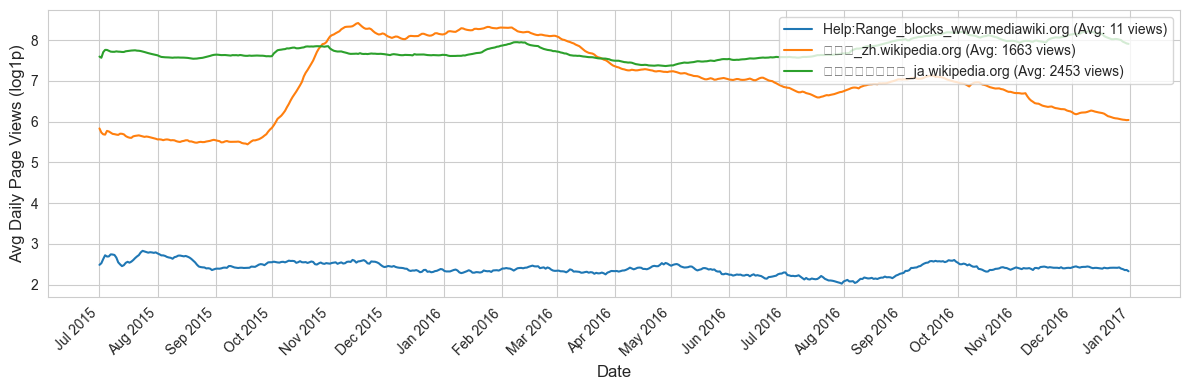

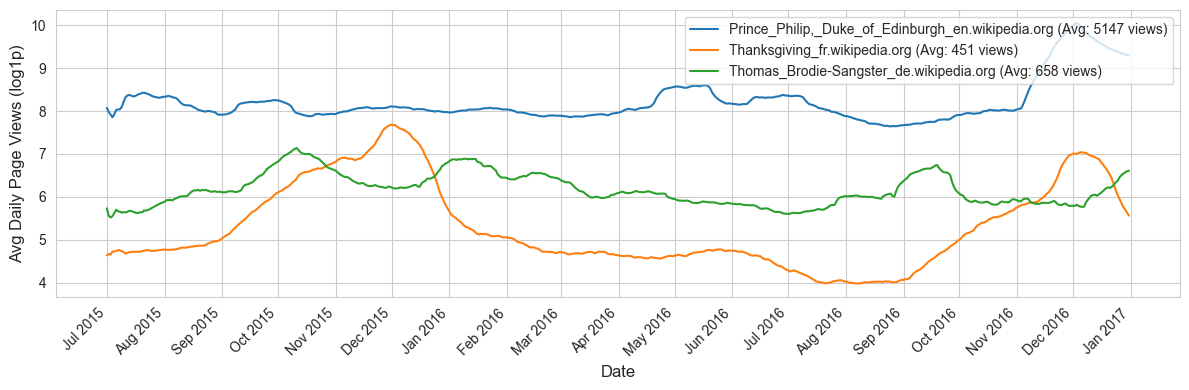

In [16]:
merged_data = pd.read_csv('Merged_Wikipedia_Traffic.csv')
plot_wikipedia_traffic(merged_data, pages_to_compare=9, window_size=30, show_by_month=True)

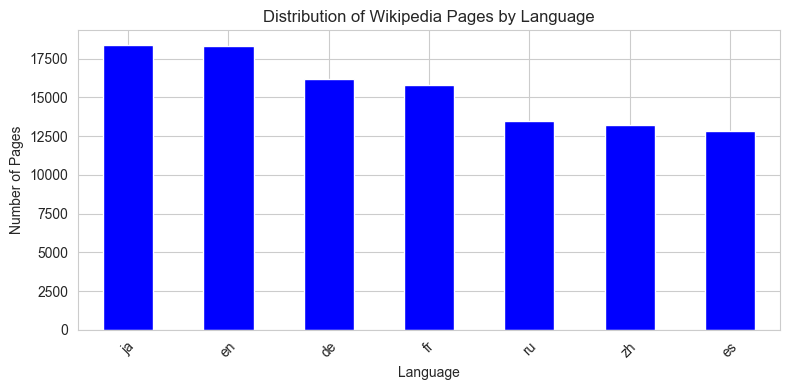

In [17]:
merged_data = pd.read_csv('Merged_Wikipedia_Traffic.csv')# Extract components from the Page
merged_data['Topic'] = merged_data['Page'].apply(lambda x: '_'.join(x.split('_')[:-3]))  # Extract topic
merged_data['Language'] = merged_data['Page'].apply(lambda x: x.split('_')[-3].split('.')[0])  # Extract language
merged_data['Access_Type'] = merged_data['Page'].apply(lambda x: x.split('_')[-2])  # Extract access type
merged_data['Agent'] = merged_data['Page'].apply(lambda x: x.split('_')[-1])  # Extract data agent

# list of valid languages (ISO codes for common Wikipedia languages)
valid_languages = ['en', 'zh', 'fr', 'de', 'es', 'ja', 'ru', 'it', 'pt', 'nl', 'ar', 'sv', 'pl', 'vi', 'ko', 'he', 'cs']

merged_data_filtered = merged_data[merged_data['Language'].isin(valid_languages)]
language_distribution = merged_data_filtered['Language'].value_counts()
plt.figure(figsize=(8, 4))
language_distribution.plot(kind='bar', color='blue')
plt.title('Distribution of Wikipedia Pages by Language')
plt.xlabel('Language')
plt.ylabel('Number of Pages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Language column is present.


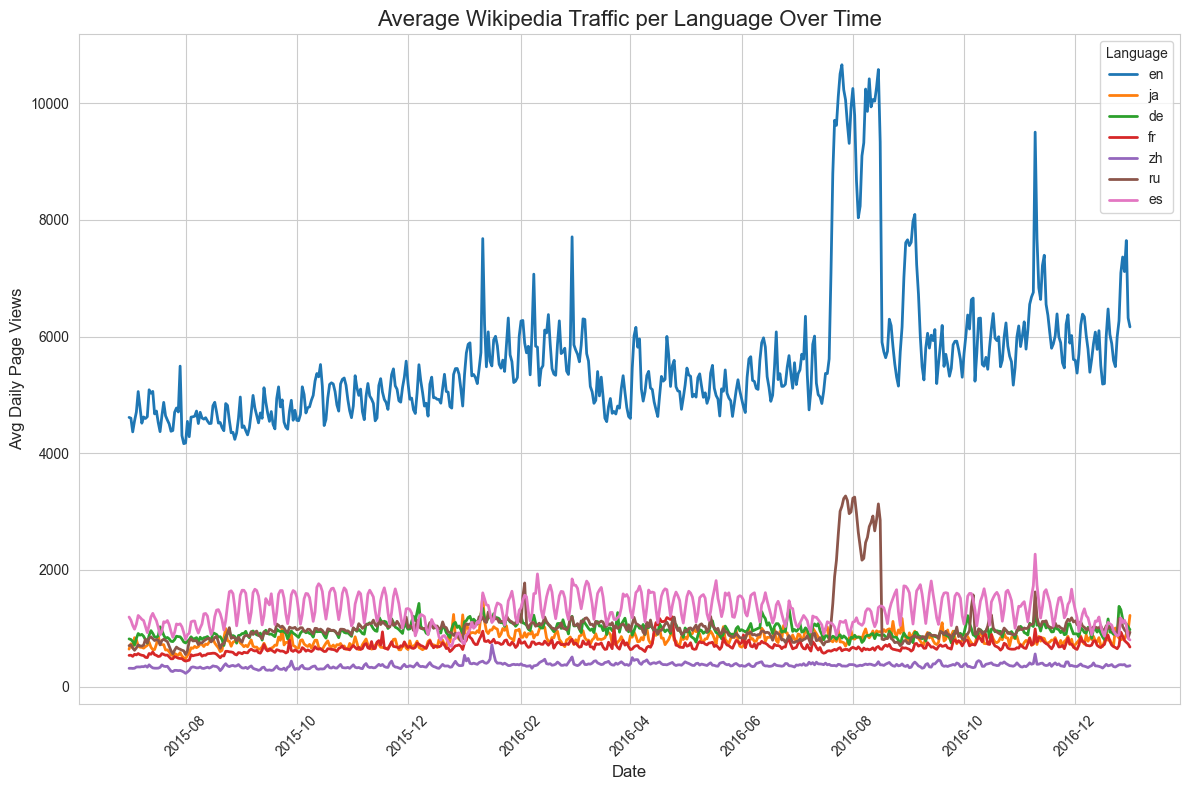

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the merged dataset
merged_data = pd.read_csv('Merged_Wikipedia_Traffic.csv')

# Extract 'Topic', 'Language', 'Access_Type', 'Agent' from the 'Page' column
merged_data['Topic'] = merged_data['Page'].apply(lambda x: '_'.join(x.split('_')[:-3]))  # Extract topic
merged_data['Language'] = merged_data['Page'].apply(lambda x: x.split('_')[-3].split('.')[0])  # Extract language
merged_data['Access_Type'] = merged_data['Page'].apply(lambda x: x.split('_')[-2])  # Extract access type
merged_data['Agent'] = merged_data['Page'].apply(lambda x: x.split('_')[-1])  # Extract data agent

# List of valid languages (ISO codes for common Wikipedia languages)
valid_languages = ['en', 'zh', 'fr', 'de', 'es', 'ja', 'ru', 'it', 'pt', 'nl', 'ar', 'sv', 'pl', 'vi', 'ko', 'he', 'cs']

# Filter to keep only rows with valid languages
merged_data_filtered = merged_data[merged_data['Language'].isin(valid_languages)]

# Extract the date columns from the dataframe
date_columns = merged_data.columns[1:-4]  # Exclude non-date columns like 'Page', 'Topic', 'Language', etc.

# Convert date columns to datetime format
date_columns = pd.to_datetime(date_columns, format='%Y-%m-%d', errors='coerce')

# Update the merged_data's columns to keep the correct column names
merged_data_filtered.columns = ['Page'] + list(date_columns) + ['Topic', 'Language', 'Access_Type', 'Agent']

# Filter out any rows where dates are invalid
merged_data_filtered = merged_data_filtered.dropna(axis=1, how='all')

# List of languages to compare
languages = ['en', 'ja', 'de', 'fr', 'zh', 'ru', 'es']

# Prepare language-based traffic sums
lang_sets = {}
for lang in languages:
    lang_data = merged_data_filtered[merged_data_filtered['Language'] == lang].iloc[:, 1:len(date_columns) + 1]
    if not lang_data.empty:
        lang_sets[lang] = lang_data.apply(pd.to_numeric, errors='coerce')

# Create a dictionary to store average traffic per language
sums = {}
for key in lang_sets:
    num_pages = lang_sets[key].shape[0]
    if num_pages > 0:
        sums[key] = lang_sets[key].sum(axis=0) / num_pages

# Plot the average traffic per language
plt.figure(figsize=(12, 8))
for key, avg_traffic in sums.items():
    if not avg_traffic.empty:
        plt.plot(date_columns, avg_traffic.values, label=f'{key}', linewidth=2)

# Customize the plot
plt.title('Average Wikipedia Traffic per Language Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Avg Daily Page Views', fontsize=12)

# Set x-axis to display monthly dates correctly
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  
plt.xticks(rotation=45)

# Add grid lines
plt.grid(True)

# Add the legend and finalize the layout
plt.legend(title='Language', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()